# Creating subplots

At this point you should know the basics of making plots with Matplotlib. Now we will expand on our basic plotting skills to learn how to create more advanced plots. In this section, we will show how to visualize data using pandas/Matplotlib and create multi-panel plots such as the one below.

![_**Figure 4.10**. An example of seasonal temperatures for 2012-2013 using pandas and Matplotlib._](../img/subplots.png)

_**Figure 4.10**. An example of seasonal temperatures for 2012-2013 using pandas and Matplotlib._

## Preparing the data for plotting 

We will start again by reading in the data file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fp = "data/029740.txt"

data = pd.read_csv(
    fp,
    delim_whitespace=True,
    na_values=["*", "**", "***", "****", "*****", "******"],
    usecols=["YR--MODAHRMN", "TEMP", "MAX", "MIN"],
    parse_dates=["YR--MODAHRMN"],
    index_col="YR--MODAHRMN",
)

After reading the file, we can new rename the `TEMP` column as `TEMP_F`, since we will later convert our temperatures from Fahrenheit to Celsius.

In [2]:
new_names = {"TEMP": "TEMP_F"}
data = data.rename(columns=new_names)

At this point we can quickly check the first rows of data to see whether the expected changes have occurred.

In [3]:
data.head()

,TEMP_F,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


Next, we have to deal with no-data values. Let's start by checking how many no-data values we have.

In [4]:
print("Number of no-data values per column: ")
print(data.isna().sum())

Number of no-data values per column: 
TEMP_F      1644
MAX       249697
MIN       249701
dtype: int64


So, there are 1644 missing values in the TEMP_F column and we should remove those. We need not worry about the no-data values in `'MAX'` and `'MIN'` columns since we will not use them for the plots produced below. We can remove rows from our DataFrame where `'TEMP_F'` is missing values using the `dropna()` method.

In [5]:
data.dropna(subset=["TEMP_F"], inplace=True)
print("Number of rows after removing no data values:", len(data))

Number of rows after removing no data values: 256028


#### Question 4.2

How many rows of data would remain if we removed all rows with any no-data values from our data (including no-data values in the `MAX` and `MIN` columns)? If you test this, be sure to save the modified DataFrame to another variable name or do not use the `inplace` parameter.

In [6]:
# Use this cell to enter your solution.

In [7]:
# Solution


len(data.dropna())

6601

Now that we have loaded the data, we can convert the temperature values from Fahrenheit to Celsius, like we have in earlier chapters.

In [8]:
data["TEMP_C"] = (data["TEMP_F"] - 32.0) / 1.8

We can once again now check the contents of our DataFrame.

In [9]:
data.head()

,TEMP_F,MAX,MIN,TEMP_C
YR--MODAHRMN,,,,
1952-01-01 00:00:00,36.0,NaN,NaN,2.222222
1952-01-01 06:00:00,37.0,NaN,34.0,2.777778
1952-01-01 12:00:00,39.0,NaN,NaN,3.888889
1952-01-01 18:00:00,36.0,39.0,NaN,2.222222
1952-01-02 00:00:00,36.0,NaN,NaN,2.222222


## Subplots

Having processed and cleaned the data we can now continue working with it and learn how to create figures that contain {term}`subplots`. Subplots are used to display multiple plots in different panels of the same figure, as shown at the start of this section (Figure 4.10).

We can start with creating the subplots by dividing the data in the data file into different groups. In this case we can divide the temperature data into temperatures for the four different seasons of the year. We can make the following selections:

- Winter (December 2012 - February 2013)
- Spring (March 2013 - May 2013)
- Summer (June 2013 - August 2013)
- Autumn (Septempber 2013 - November 2013)

In [10]:
winter = data.loc[(data.index >= "201212010000") & (data.index < "201303010000")]
winter_temps = winter["TEMP_C"]

spring = data.loc[(data.index >= "201303010000") & (data.index < "201306010000")]
spring_temps = spring["TEMP_C"]

summer = data.loc[(data.index >= "201306010000") & (data.index < "201309010000")]
summer_temps = summer["TEMP_C"]

autumn = data.loc[(data.index >= "201309010000") & (data.index < "201312010000")]
autumn_temps = autumn["TEMP_C"]

Let's have a look at the data from two different seasons to see whether the preceding step appears to have worked as expected.

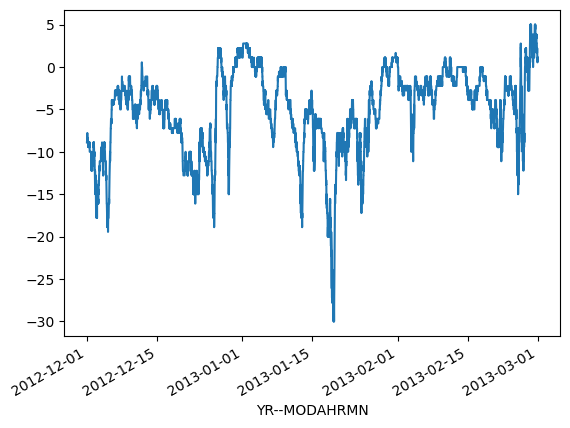

In [11]:
ax1 = winter_temps.plot()

_**Figure 4.11**. Winter temperatures for 2012-2013._

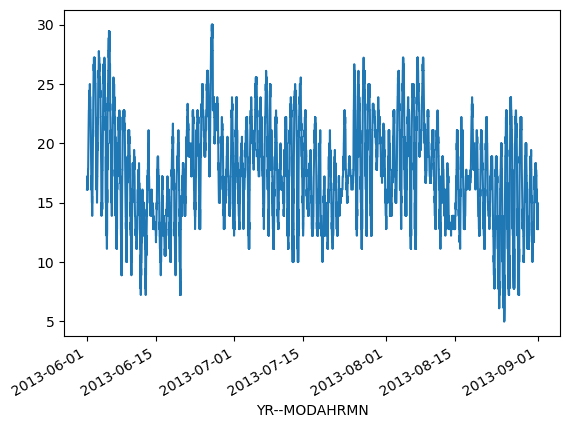

In [12]:
ax2 = summer_temps.plot()

_**Figure 4.12**. Summer temperatures for 2012-2013._

Based on the plots above it looks that the correct seasons have been plotted and the temperatures between winter and summer are quite different, as we would expect. One thing we might need to consider with this is that the y-axis range currently varies between the two plots and we may want to define axis ranges that ensure the data are plotted with the same y-axis ranges in all subplots. This will help make it easier to visually compare the temperatures between seasons.

**Finding the data bounds**

In order to define y-axis limits that will include the data from all of the seasons and be consistent between subplots we first need to find the minimum and maximum temperatures from all of the seasons.
In addition, we should consider that it would be beneficial to have some extra space (padding) between the y-axis limits and those values, such that, for example, the maximum y-axis limit is five degrees higher than the maximum temperature and the minimum y-axis limit is five degrees lower than the minimum temperature. We can do that below by calculating the minumum of each seasons minumum temperature and subtracting five degrees.

In [13]:
# Find lower limit for y-axis
min_temp = min(
    winter_temps.min(), spring_temps.min(), summer_temps.min(), autumn_temps.min()
)
min_temp = min_temp - 5.0

# Find upper limit for y-axis
max_temp = max(
    winter_temps.max(), spring_temps.max(), summer_temps.max(), autumn_temps.max()
)
max_temp = max_temp + 5.0

# Print y-axis min, max
print(f"Minimum temperature: {min_temp}")
print(f"Maximum temperature: {max_temp}")

Minimum temperature: -35.0
Maximum temperature: 35.0


We can now use this temperature range to standardize the y-axis ranges of our plots.

**Displaying multiple subplots in a single figure**

With the data split into seasons and y-axis range defined we can now continue to plot data from all four seasons the same figure. We will start by creating a figure containing four subplots in a 2x2 panel using Matplotlib’s `subplots()` function. In the `subplots()` function, the user can specify how many rows and columns of plots they want to have in their figure.
We can also specify the size of our figure with `figsize()` parameter that takes the `width` and `height` values (in inches) as input.

array([[<AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >]], dtype=object)

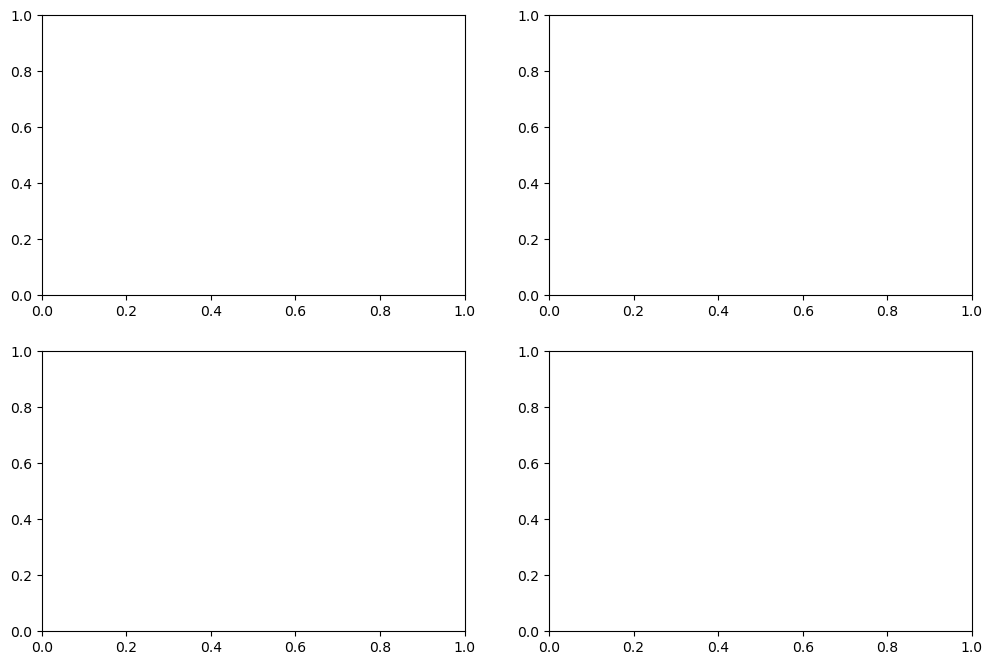

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs

_**Figure 4.13**. Empty figure template with a 2x2 subplot panel._

We can see that as a result we have now a list containing two nested lists, where the first one contains the axes for column 1 and 2 of **row 1** and the second list contains the axes for columns 1 and 2 of **row 2**.

To make it easier to keep track of things, we can parse these axes into their own variables as follows.

In [15]:
ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]

Now we have four different axis variables for the different panels in our figure.
Next we can use these axes to plot the seasonal temperature data.
We can start by plotting the data for the different seasons with different colors for each of the lines, and we can specify the *y*-axis limits to be the same for all of the subplots.
- We can use the `c` parameter to change the color of the line. You can define colors using RBG color codes, but it is often easier to use one of the [Matplotlib named colors](https://matplotlib.org/stable/gallery/color/named_colors.html) [^matplotlib_colors].
- We can also change the line width or weight using the `lw`.
- The `ylim` parameter can be used to define the y-axis limits.

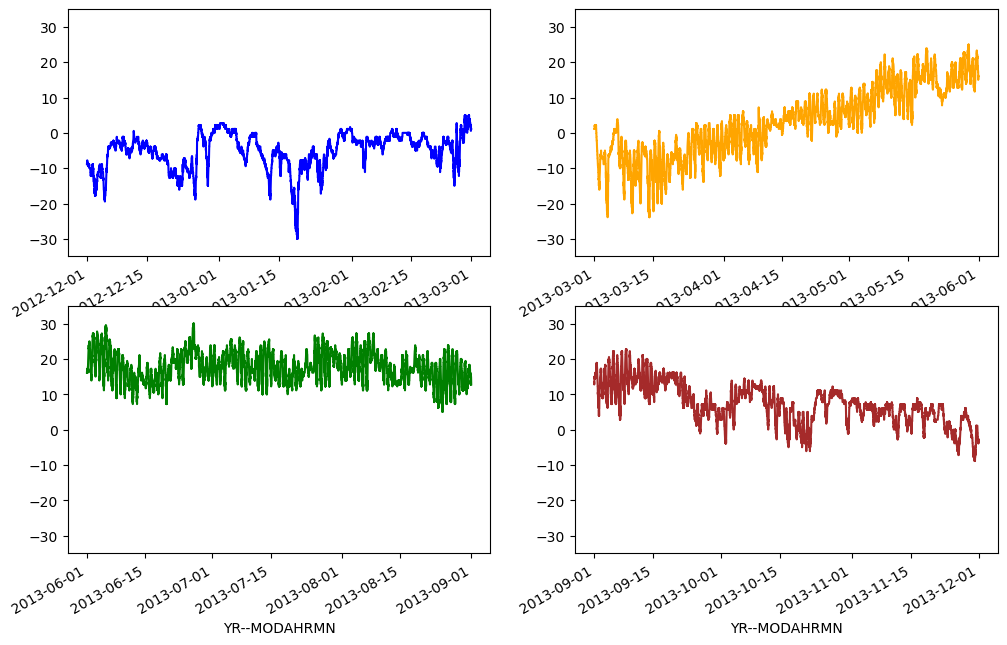

In [16]:
# Set plot line width
line_width = 1.5

# Plot data
winter_temps.plot(ax=ax11, c="blue", lw=line_width, ylim=[min_temp, max_temp])
spring_temps.plot(ax=ax12, c="orange", lw=line_width, ylim=[min_temp, max_temp])
summer_temps.plot(ax=ax21, c="green", lw=line_width, ylim=[min_temp, max_temp])
autumn_temps.plot(ax=ax22, c="brown", lw=line_width, ylim=[min_temp, max_temp])

# Display figure
fig

_**Figure 4.14**. Seasonal temperatures for 2012-2013 plotted in a 2x2 panel._

Great, now we have all the plots in same figure! However, we can see that there are some problems with our *x*-axis labels and a few other missing plot items we should add. 

Let's re-create the plot and make some improvements. In this version of the plot we will:

- Modify the x- and y-axis labels using the `xlabel` and `ylabel` parameters in the `plot()` function.
- Enable grid lines on the plot using the `grid=True` parameter for the `plot()` function.
- Add a figure title using the `fig.suptitle()` function.
- Rotate the x-axis labels using the `plt.setp()` function.
- Add a text label for each plot panel using the `text()` function.

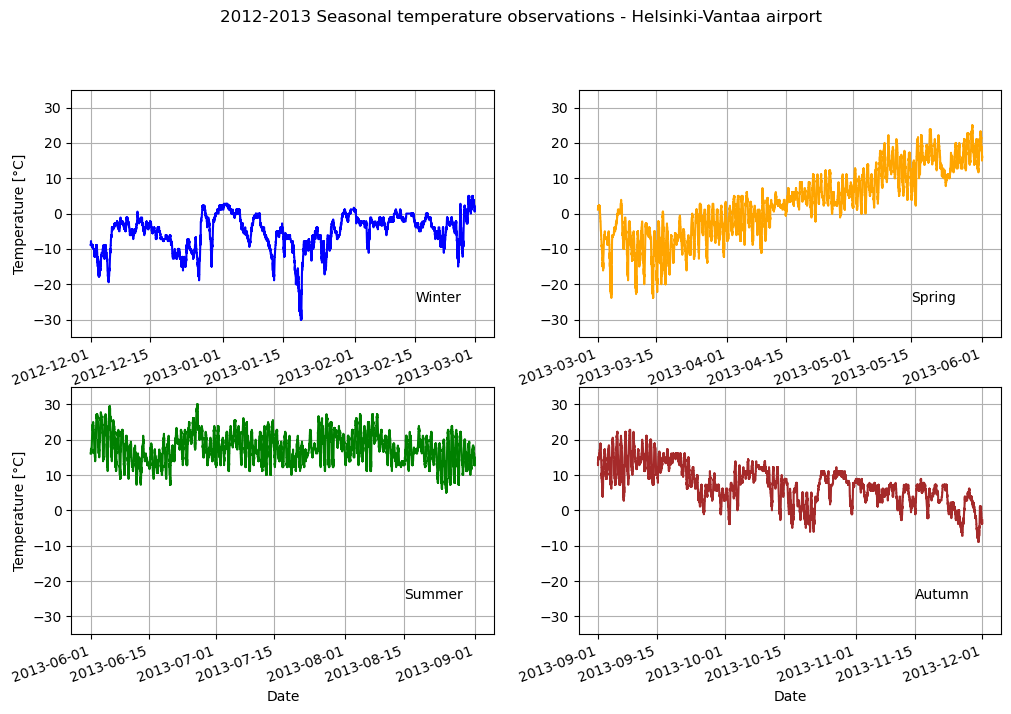

In [17]:
# Create the new figure and subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Rename the axes for ease of use
ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]

# Set plot line width
line_width = 1.5

# Plot data
winter_temps.plot(
    ax=ax11,
    c="blue",
    lw=line_width,
    ylim=[min_temp, max_temp],
    ylabel="Temperature [°C]",
    grid=True,
)
spring_temps.plot(
    ax=ax12, c="orange", lw=line_width, ylim=[min_temp, max_temp], grid=True
)
summer_temps.plot(
    ax=ax21,
    c="green",
    lw=line_width,
    ylim=[min_temp, max_temp],
    xlabel="Date",
    ylabel="Temperature [°C]",
    grid=True,
)
autumn_temps.plot(
    ax=ax22,
    c="brown",
    lw=line_width,
    ylim=[min_temp, max_temp],
    xlabel="Date",
    grid=True,
)

# Set figure title
fig.suptitle("2012-2013 Seasonal temperature observations - Helsinki-Vantaa airport")

# Rotate the x-axis labels so they don't overlap
plt.setp(ax11.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax21.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax22.xaxis.get_majorticklabels(), rotation=20)

# Season label text
ax11.text(pd.to_datetime("20130215"), -25, "Winter")
ax12.text(pd.to_datetime("20130515"), -25, "Spring")
ax21.text(pd.to_datetime("20130815"), -25, "Summer")
ax22.text(pd.to_datetime("20131115"), -25, "Autumn")

# Display figure
plt.show()

_**Figure 4.15**. Seasonal temperatures for 2012-2013 plotted with season names and gridlines visible._


The new version of the figure essentially conveys the same information as the first version, but the additional plot items help to make it easier to see the plot values and immediately understand the data being presented. Not bad.

#### Question 4.3

Visualize only the winter and summer temperatures in a 1x2 panel figure. Save the resulting figure as a .png file.

In [18]:
# Use this cell to enter your solution.

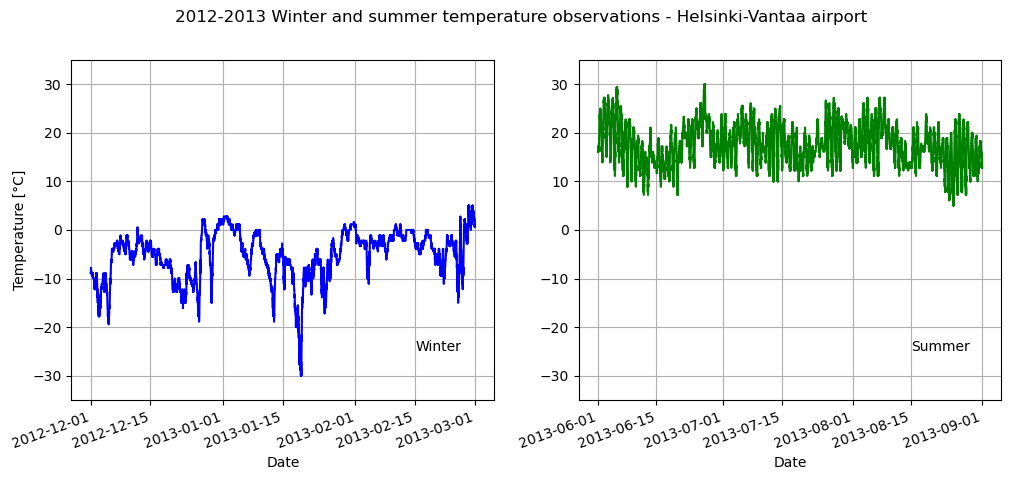

In [19]:
# Solution

# Create the new figure and subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Rename the axes for ease of use
ax1 = axs[0]
ax2 = axs[1]

# Set plot line width
line_width = 1.5

# Plot data
winter_temps.plot(
    ax=ax1,
    c="blue",
    lw=line_width,
    ylim=[min_temp, max_temp],
    xlabel="Date",
    ylabel="Temperature [°C]",
    grid=True,
)
summer_temps.plot(
    ax=ax2,
    c="green",
    lw=line_width,
    ylim=[min_temp, max_temp],
    xlabel="Date",
    grid=True,
)

# Set figure title
fig.suptitle(
    "2012-2013 Winter and summer temperature observations - Helsinki-Vantaa airport"
)

# Rotate the x-axis labels so they don't overlap
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=20)

# Season label text
ax1.text(pd.to_datetime("20130215"), -25, "Winter")
ax2.text(pd.to_datetime("20130815"), -25, "Summer")

plt.show()

## Footnotes

[^matplotlib_colors]: <https://matplotlib.org/stable/gallery/color/named_colors.html>